<u><h1 color='yellow'><b><center>UNLOCKING BUSINESS POTENTIAL</center></b></h1></u>
<p style="font-family: 'Times New Roman', Times, serif;"><b><h3 align='right'>PRESENTED BY: VAISHNAV P V</h3></b></p>


<h4><b><u>INTRODUCTION</u></b></h4>

<b>OBJECTIVE:- To determine the company performance<br>
TYPE OF PROBLEM:- Classification problem as there is only true or flase values.</b>








<b>MODELS USED</u><br>
   <b> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Random Forest<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Logistic Regression<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- K Nearest Neighbor Classifier<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Support vector Machine {SVM}<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Gradient Boost regressor<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- AdaBoost regressor<br></b></p>
    


<h4><u><b>LIBRARY IMPORTS:-</b></u></h4>

In [2]:
# Data analysis
import pandas as pd
import numpy as np

# Drawing
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,mean_squared_error,r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<u><h4><b>READ DATASET:-</b></h3></u>

In [3]:
data = pd.read_csv('COMPANY_DATA.csv')
data

,company_name,revenue ($),COGS ($),current_sales ($),debts_level ($),market_share ($),stock_prices ($),historical_sales ($),performance
0,Vitz,899023.0,212413.0,1695298.0,355711.0,650023.0,191.0,512766.0,Declined
1,NaN,733768.0,219788.0,725298.0,NaN,578388.0,383.0,568702.0,Improved
2,Trudoo,606446.0,151961.0,1975931.0,167952.0,974909.0,351.0,NaN,Improved
3,Babbleopia,888639.0,NaN,2100904.0,NaN,NaN,212.0,NaN,Improved
4,NaN,934974.0,NaN,1695298.0,NaN,251255.0,91.0,NaN,Declined
...,...,...,...,...,...,...,...,...,...
960,Oyondu,501477.0,NaN,942152.0,298268.0,513177.0,297.0,1119744.0,Declined
961,Tazz,834652.0,145057.0,NaN,488001.0,NaN,312.0,597803.0,Improved
962,Gevee,605810.0,165013.0,NaN,NaN,321238.0,298.0,613057.0,Declined
963,NaN,NaN,133952.0,919712.0,291548.0,248772.0,118.0,924661.0,Declined


<h4><b><u>DATASET OVERVIEW</u></b></h4>
<b>DATA SIZE: [965,9]</b><br>
<b>DATA SOURCE: KAGGLE</b>


In [4]:
# no.of rows and columns
print("We have",data.shape[0],"rows and",data.shape[1],"columns")

We have 965 rows and 9 columns


In [5]:
# check the descriptive statistics of the data
data.describe(include='all')

,company_name,revenue ($),COGS ($),current_sales ($),debts_level ($),market_share ($),stock_prices ($),historical_sales ($),performance
count,724,724.000000,724.000000,7.250000e+02,724.000000,724.000000,724.000000,7.240000e+02,965
unique,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Thoughtstorm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Improved
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,558
mean,NaN,749786.053867,163741.904696,1.181439e+06,276103.345304,543047.099448,258.941989,1.129188e+06,NaN
std,NaN,146782.414968,37069.024732,5.674764e+05,131078.665109,266121.192226,142.744564,5.151689e+05,NaN
min,NaN,500710.000000,100703.000000,1.788540e+05,50612.000000,101435.000000,10.000000,2.002280e+05,NaN
25%,NaN,616163.000000,131621.250000,7.136900e+05,153592.500000,308361.250000,131.000000,7.148952e+05,NaN
50%,NaN,752245.000000,164054.500000,1.188328e+06,280119.500000,546304.000000,262.500000,1.136671e+06,NaN
75%,NaN,879137.250000,193983.000000,1.618967e+06,390264.750000,784004.250000,387.250000,1.572767e+06,NaN


In [6]:
# checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_name          724 non-null    object 
 1   revenue ($)           724 non-null    float64
 2   COGS ($)              724 non-null    float64
 3   current_sales ($)     725 non-null    float64
 4   debts_level ($)       724 non-null    float64
 5   market_share ($)      724 non-null    float64
 6   stock_prices ($)      724 non-null    float64
 7   historical_sales ($)  724 non-null    float64
 8   performance           965 non-null    object 
dtypes: float64(7), object(2)
memory usage: 68.0+ KB


<h4><b><u>DATA PREPROCESSING</u></b></h4>

<b>DROPING UNWANTED COLUMNS:</b>

In [7]:
#removing column company_name
data=data.drop(['company_name'],axis=1)

In [8]:
data

,revenue ($),COGS ($),current_sales ($),debts_level ($),market_share ($),stock_prices ($),historical_sales ($),performance
0,899023.0,212413.0,1695298.0,355711.0,650023.0,191.0,512766.0,Declined
1,733768.0,219788.0,725298.0,NaN,578388.0,383.0,568702.0,Improved
2,606446.0,151961.0,1975931.0,167952.0,974909.0,351.0,NaN,Improved
3,888639.0,NaN,2100904.0,NaN,NaN,212.0,NaN,Improved
4,934974.0,NaN,1695298.0,NaN,251255.0,91.0,NaN,Declined
...,...,...,...,...,...,...,...,...
960,501477.0,NaN,942152.0,298268.0,513177.0,297.0,1119744.0,Declined
961,834652.0,145057.0,NaN,488001.0,NaN,312.0,597803.0,Improved
962,605810.0,165013.0,NaN,NaN,321238.0,298.0,613057.0,Declined
963,NaN,133952.0,919712.0,291548.0,248772.0,118.0,924661.0,Declined


<b>DATASET BALANCE:-</b>

In [9]:
# retrieving the count of datas in column performance
data['performance'].value_counts()

performance
Improved    558
Declined    407
Name: count, dtype: int64

<b>CHECK FOR NaN:-</b>

In [10]:
# check  what total_missing contains
data.isna().sum()

revenue ($)             241
COGS ($)                241
current_sales ($)       240
debts_level ($)         241
market_share ($)        241
stock_prices ($)        241
historical_sales ($)    241
performance               0
dtype: int64

<b>DEALING NaN:-</b>

In [11]:
col=data[['revenue ($)','COGS ($)','current_sales ($)','debts_level ($)','market_share ($)','stock_prices ($)','historical_sales ($)']]
for i in col:
    data[i]=data[i].fillna(method='ffill')


<b>RECHECK FOR NaN:-</b>

In [12]:
# Re-check  what total_missing contains
data.isna().sum()

revenue ($)             0
COGS ($)                0
current_sales ($)       0
debts_level ($)         0
market_share ($)        0
stock_prices ($)        0
historical_sales ($)    0
performance             0
dtype: int64

<b>CHECK FOR NON_NUMERIC COLUMNS:-</b>

In [13]:
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['performance'], dtype='object')


<b>HANDLING NON-NUMERIC COLUMNS:-</B>

In [14]:
le=LabelEncoder()

In [75]:
#datatype of column performance is generalised
data['performance']=le.fit_transform(data['performance'])

<b>RE-CHECKING:</b>

In [76]:
print(data.dtypes)

revenue ($)             float64
COGS ($)                float64
current_sales ($)       float64
debts_level ($)         float64
market_share ($)        float64
stock_prices ($)        float64
historical_sales ($)    float64
performance               int64
dtype: object


In [17]:
data.head()

,revenue ($),COGS ($),current_sales ($),debts_level ($),market_share ($),stock_prices ($),historical_sales ($),performance
0,899023.0,212413.0,1695298.0,355711.0,650023.0,191.0,512766.0,0
1,733768.0,219788.0,725298.0,355711.0,578388.0,383.0,568702.0,1
2,606446.0,151961.0,1975931.0,167952.0,974909.0,351.0,568702.0,1
3,888639.0,151961.0,2100904.0,167952.0,974909.0,212.0,568702.0,1
4,934974.0,151961.0,1695298.0,167952.0,251255.0,91.0,568702.0,0


In [23]:
data['performance'].max()

1

<b><h4><U>EXPLORATORY DATA ANALYSIS (EDA)</U></H4></B>

<b>PIE-CHART</B>

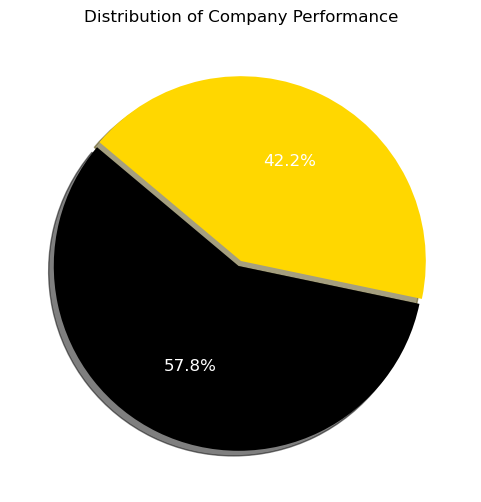

In [18]:
performance_counts = data['performance'].value_counts()
explode=(0.03,0)
c_label=['Improved','Declined']
plt.figure(figsize=(6, 6))
plt.pie(performance_counts, labels=c_label, autopct='%1.1f%%', startangle=140,textprops={'color': 'w', 'fontsize': 12}, colors=['black','gold'],shadow=True,explode=explode)
plt.title("Distribution of Company Performance")
plt.show()

<b>SCATTER PLOT</B>

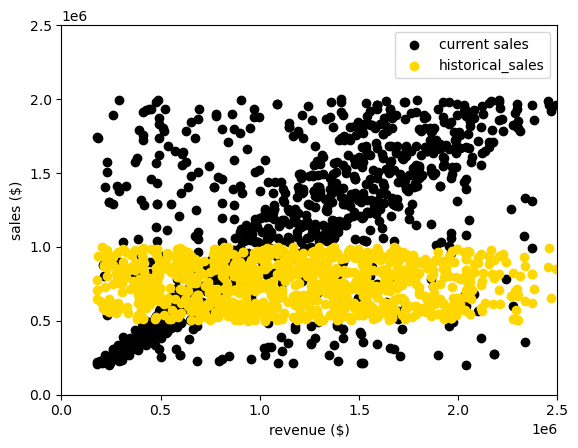

In [67]:
plt.scatter(data['current_sales ($)'],data['historical_sales ($)'],c='black')
plt.scatter(data['current_sales ($)'],data['revenue ($)'],c='gold')
plt.xlabel('revenue ($)')
plt.ylabel('sales ($)')
plt.xlim(0,2500000)
plt.ylim(0,2500000)
plt.legend(['current sales','historical_sales'])

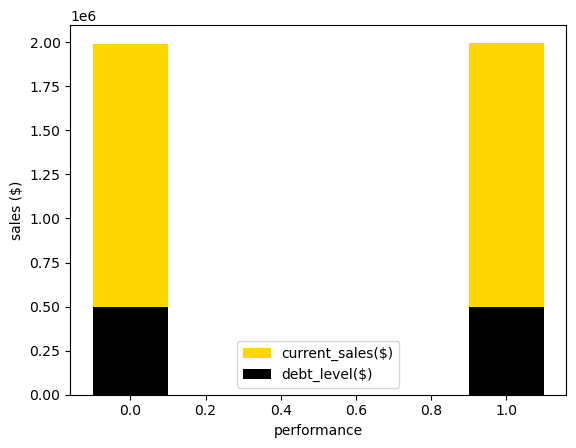

In [68]:

w=0.2
plt.bar(data['performance'],data['historical_sales ($)'],color='gold',width=w)
plt.bar(data['performance'],data['debts_level ($)'],color='black',width=w)
plt.xlabel('performance')
plt.ylabel('sales ($)')
plt.legend(['current_sales($)','debt_level($)'])

<h4><b><u>CORRELATION AND HEATMAP</u></b></h4>

In [72]:
#correlation
data.corr()

,revenue ($),COGS ($),current_sales ($),debts_level ($),market_share ($),stock_prices ($),historical_sales ($),performance
revenue ($),1.000000,0.074933,-0.015174,-0.045145,0.017805,-0.004337,-0.009695,0.042813
COGS ($),0.074933,1.000000,-0.064436,-0.001347,-0.004104,0.029206,-0.024574,0.002772
current_sales ($),-0.015174,-0.064436,1.000000,0.012465,0.045813,-0.016998,0.538226,0.256646
debts_level ($),-0.045145,-0.001347,0.012465,1.000000,-0.047630,-0.055658,0.002203,0.011704
market_share ($),0.017805,-0.004104,0.045813,-0.047630,1.000000,-0.025715,-0.026851,-0.027134
stock_prices ($),-0.004337,0.029206,-0.016998,-0.055658,-0.025715,1.000000,0.004219,-0.047547
historical_sales ($),-0.009695,-0.024574,0.538226,0.002203,-0.026851,0.004219,1.000000,0.026939
performance,0.042813,0.002772,0.256646,0.011704,-0.027134,-0.047547,0.026939,1.000000


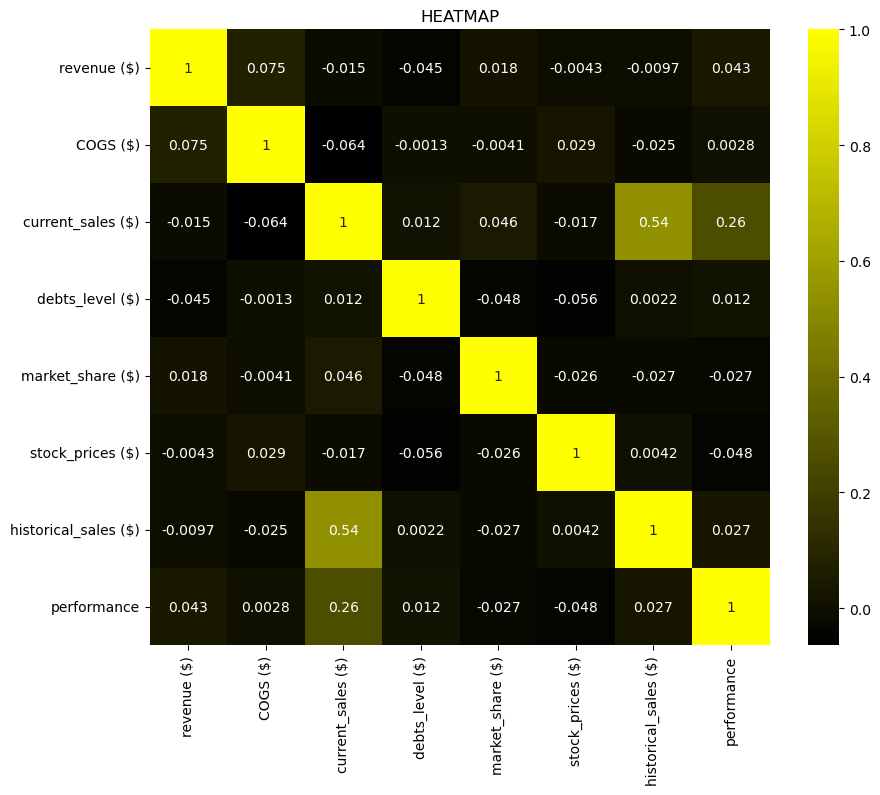

In [73]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
by = LinearSegmentedColormap.from_list("by", ["black", "yellow"])
sns.heatmap(data.corr(), annot=True, cmap=by)
plt.title('HEATMAP')
plt.show()

In [84]:
#corr=data.corr()
#chosen_column=data['performance']
#correlations=corr[chosen_column]
#correlations=correlations.drop(chosen_column)
#best=correlations.abs().idxmax()
#best_corr_value = correlations[best_corr_column]

#print(f"The column most correlated with '{chosen_column}' is '{best}' with a correlation of {best_corr_value}")



<h4><u><b>FEATURES AND TARGETS:</B></h4></u>

In [90]:
# Split data into features (x) and target (y)
x = data.drop(['performance'], axis=1)
y = data['performance']

In [91]:
x

,revenue ($),COGS ($),current_sales ($),debts_level ($),market_share ($),stock_prices ($),historical_sales ($)
0,899023.0,212413.0,1695298.0,355711.0,650023.0,191.0,512766.0
1,733768.0,219788.0,725298.0,355711.0,578388.0,383.0,568702.0
2,606446.0,151961.0,1975931.0,167952.0,974909.0,351.0,568702.0
3,888639.0,151961.0,2100904.0,167952.0,974909.0,212.0,568702.0
4,934974.0,151961.0,1695298.0,167952.0,251255.0,91.0,568702.0
...,...,...,...,...,...,...,...
960,501477.0,197834.0,942152.0,298268.0,513177.0,297.0,1119744.0
961,834652.0,145057.0,942152.0,488001.0,513177.0,312.0,597803.0
962,605810.0,165013.0,942152.0,488001.0,321238.0,298.0,613057.0
963,605810.0,133952.0,919712.0,291548.0,248772.0,118.0,924661.0


In [92]:
y

0      0
1      1
2      1
3      1
4      0
      ..
960    0
961    1
962    0
963    0
964    0
Name: performance, Length: 965, dtype: int32

<b><h4><u>MODEL SCALING ,SPLITTING AND TRAINING:</u></h4></b>

In [93]:
# Train-test split (80% for training, 20% for testing)
#random_state is the seed used by the random number generator. It can be any integer.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [94]:
# Feature scaling using StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

<h4><b><U>MODEL TRAINING</B></U></b></h4>


<ul><li><b>Random Forest:</b></li></ul><p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Random Forest is an ensemble learning algorithm that combines multiple decision trees to improve predictive accuracy and control overfitting. Each tree in the forest is trained on a random subset of the data and a random subset of features, and the final prediction is typically the majority vote (for classification) or the average (for regression) of all trees. This randomness makes Random Forests robust to noise and improves generalization on unseen data.</b></p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [95]:
# Random Forest Model
rdf_model=RandomForestClassifier(n_estimators=48,random_state=30,max_depth=8)

In [96]:
# Fit the model on the training data
rdf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=48, random_state=30)

In [97]:
y_pred_train1=rdf_model.predict(x_train)
y_pred_test1=rdf_model.predict(x_test)

In [98]:
# Calculating the scores
rdf_model.score(x_train,y_train)
rdf_model.score(x_test,y_test)
lr_cvs=cross_val_score(rdf_model,x,y,cv=5,).mean()

In [99]:
print("CLASSIFICATION REPORT OF RANDOM FOREST:\n\n",classification_report(y_test,y_pred_test1))

CLASSIFICATION REPORT OF RANDOM FOREST:

               precision    recall  f1-score   support

           0       0.51      0.42      0.46       119
           1       0.64      0.71      0.67       171

    accuracy                           0.59       290
   macro avg       0.57      0.57      0.57       290
weighted avg       0.58      0.59      0.59       290



<ul><li><b>Logistic Regression:</b></li></ul><p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Logistic regression is a statistical model used for binary classification tasks, predicting the probability that a given input belongs to a particular class. It calculates this probability using a sigmoid function, which outputs values between 0 and 1, allowing it to classify inputs as belonging to one of two classes. Despite its name, logistic regression is used primarily for classification, not regression.</b></p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [100]:
# Logistic Regression model
lgs_model=LogisticRegression()

In [101]:
# Fit the model on the training data
lgs_model.fit(x_train,y_train)

LogisticRegression()

In [102]:
y_pred_train2=lgs_model.predict(x_train)
y_pred_test2=lgs_model.predict(x_test)


In [103]:
# Calculating the scores
train_score=r2_score(y_train,y_pred_train2)
r2_score(y_test,y_pred_test2)
lgs_cvs=cross_val_score(lgs_model,x,y,cv=5).mean()
train_score


-0.5988372093023258

In [104]:
print("CLASSIFICATION REPORT LOGISTIC REGRESSION\n\n",classification_report(y_test,y_pred_test2))

CLASSIFICATION REPORT LOGISTIC REGRESSION

               precision    recall  f1-score   support

           0       0.62      0.39      0.48       119
           1       0.66      0.83      0.74       171

    accuracy                           0.65       290
   macro avg       0.64      0.61      0.61       290
weighted avg       0.65      0.65      0.63       290



<ul><li><b>K Nearest Neighbor (KNN):</b></li></ul><p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>The *K-Nearest Neighbors (KNN)* algorithm is a simple, instance-based learning method used for classification and regression. It classifies data points based on the majority class of their closest \(k\) neighbors in the feature space. KNN is non-parametric and works well for small, well-separated datasets but can be computationally intensive for large datasets.</b></p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [105]:
# K Nearest Neighbor (KNN) model
knn_model=KNeighborsClassifier(n_neighbors=10)

In [106]:
# Fit the model on the training data
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [107]:
y_pred_train3 = knn_model.predict(x_train)
y_pred_test3 = knn_model.predict(x_test)

In [108]:
# Calculating the scores
r2_score(y_train,y_pred_train2)
r2_score(y_test,y_pred_test2)
knn_cvs=cross_val_score(knn_model,x,y,cv=5,).mean()

In [109]:
print("CLASSIFICATION REPORT K-NEAREST NEIGHBOR\n\n",classification_report(y_test,y_pred_test3))

CLASSIFICATION REPORT K-NEAREST NEIGHBOR

               precision    recall  f1-score   support

           0       0.57      0.66      0.61       119
           1       0.73      0.65      0.69       171

    accuracy                           0.65       290
   macro avg       0.65      0.65      0.65       290
weighted avg       0.66      0.65      0.65       290



<ul><li><b>Support Vector Machine {SVM}:</b></li></ul><p><b>Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates data points of different classes with the maximum margin between them. SVM is particularly effective for high-dimensional spaces and cases where clear margin separation exists between classes.</b></p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [110]:
# HYPERPARAMETER TUNING
# Define parameter grid for different kernels
param_grid = [{'kernel': ['linear'], 'C': [0.1, 1, 10]},
              {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3], 'gamma': ['scale']},
              {'kernel': ['sigmoid'], 'C': [0.1, 1, 10], 'gamma': ['scale']}]


In [ ]:
# Perform grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

In [ ]:
# Output best parameters and performance on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
report=classification_report(y_test, y_pred,output_dict=True)
sv_cvs=report['weighted avg']['f1-score']

In [ ]:
print("Best parameters:", grid_search.best_params_,"\n")
print("CLASSIFICATION REPORT SVM\n\n",classification_report(y_test, y_pred))

<ul><li><b>Gradient Boosting:</b></li></ul><p><b>Gradient Boosting is an ensemble machine learning technique that builds a series of decision trees sequentially, where each tree aims to correct the errors of the previous ones. It optimizes model accuracy by minimizing a loss function, making it effective for both classification and regression tasks.</b></p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [ ]:
# Gradient Booting m[odel
gb_model=GradientBoostingRegressor()

In [ ]:
# Fit the model on the training data
gb_model.fit(x_train,y_train)

In [ ]:
y_pred_train4=gb_model.predict(x_train)
y_pred_test4=gb_model.predict(x_test)

In [ ]:
# Calculating the scores
r2_score(y_train,y_pred_train4)
r2_score(y_test,y_pred_test4)
gb_cvs=cross_val_score(gb_model,x,y,cv=5,).mean()

<ul><li><b>AdaBoost:</b></li></ul><b><p>AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple weak classifiers, typically decision trees, to create a strong classifier. It adjusts the weights of misclassified samples to focus more on difficult cases in subsequent iterations.</p></b>

In [ ]:
# Initialize a base classifier (e.g., DecisionTreeClassifier)
base_classifier = DecisionTreeClassifier(max_depth=1)

In [ ]:
# Initialize the AdaBoost classifier
ada_model = AdaBoostClassifier(estimator=base_classifier, n_estimators=50, random_state=42)

In [ ]:
# Train the AdaBoost model
ada_model.fit(x_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_train5=ada_model.predict(x_train)
y_pred_test5=ada_model.predict(x_test)

In [ ]:
# Evaluate the model's accuracy
# Calculating the scores
r2_score(y_train,y_pred_train5)
r2_score(y_test,y_pred_test5)
ada_cvs=cross_val_score(ada_model,x,y,cv=5,).mean()

In [ ]:
print("CLASSIFICATION REPORT AdaBoost\n\n",classification_report(y_test,y_pred_test5))

<U><h3><b>MODEL EVALUATION</B></h3></U>

In [ ]:
scores=pd.DataFrame({"MODEL":["RandomForest","LogisticRegression","KNearestNeighbor","SupportVectorMachine","GradientBoost","AdaBoost"],"SCORE":[lr_cvs,lgs_cvs,knn_cvs,sv_cvs,gb_cvs,ada_cvs]})
scores

In [ ]:
max_val_score=scores.loc[scores['SCORE']==scores['SCORE'].max()]

In [ ]:
print("THE SUITABLE ALGORITHM IS:\n",pd.DataFrame(max_val_score))

<U><h3><b>USER INPUT TESTING</B></h3></U>

In [ ]:
x=int(input('''DO YOU LIKE TO PREDICT YOUR OWN DATA !!!
'0.No'
'1.Yes'
'''))
if x ==0:
    print('Thank you !')
elif x==1:
    # Prompt the user for inputs for each feature
    print("Enter the following details to predict company performance:")
    revenue = float(input("Revenue ($): "))
    cogs = float(input("COGS ($): "))
    current_sales = float(input("Current Sales ($): "))
    debts_level = float(input("Debts Level ($): "))
    market_share = float(input("Market Share ($): "))
    stock_prices = float(input("Stock Prices ($): "))
    historical_sales = float(input("Historical Sales ($): "))

    # Create a DataFrame for the user input
    user_data = pd.DataFrame([[revenue, cogs, current_sales, debts_level, market_share, stock_prices, historical_sales]])

    # Predict using the model
    prediction = lgs_model.predict(user_data)
    predicted_class = le.inverse_transform(prediction)[0]
    print(f"Predicted Company Performance: {predicted_class}")
else:
    print('Input is invalid!')


<b><h3>  <U>CONCLUSION:</U></h3></B>

<b><p style="font-family: 'Times New Roman', Times, serif;">In this project, we used multiple machine learning models to predict company performance, including Random Forest Regression , Logistic Regression , KNearest Neighbor (KNN), Support Vector Machine (SVM), and Gradient Boosting , with Principle Component Analysis (PCA) for dimensionality reduction.

<p style="font-family: 'Times New Roman', Times, serif;">Our results show that Logistic Regression , Linear SVM and Polynomial SVM provided the most accurate predictions due to their ability to handle complex data patterns. PCA helped reduce computation time by simplifying the data, which was especially useful for computationally heavy models like SVM and Gradient Boosting.

<p style="font-family: 'Times New Roman', Times, serif;">Overall,  LOgistic Regression are recommended for similar prediction tasks due to their high accuracy and reliability. Using these models, companies can make more informed predictions about their future performance, supporting better decision-making.</p></b>











<center><b><p style="font-family: 'Times New Roman', Times, serif;"><h2>  <U>END OF PROJECT</U></h2></B></center>